In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, LinearSVR, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

## 4.2 Preparing data

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['data'].shape)
print(data_breast_cancer['data'].columns)

(569, 30)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [3]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['data'].shape)
print(data_iris['data'].columns)

(150, 4)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


## 4.3 Classification 
### Breast cancer dataset

In [4]:
from sklearn.model_selection import train_test_split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(data_breast_cancer['data'][['mean area', 'mean smoothness']], data_breast_cancer['target'].astype(np.uint8), test_size=0.2, random_state=42)

In [5]:
# classification without scaling
svm_clf = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),])
svm_clf.fit(X_bc_train, y_bc_train)

y_bc_train_pred = svm_clf.predict(X_bc_train)
y_bc_test_pred = svm_clf.predict(X_bc_test)
print("Accuracy of breast cancer data:", accuracy_score(y_bc_test, y_bc_test_pred))

Accuracy of breast cancer data: 0.6228070175438597


/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# classification with scaling
svm_clf_scale = Pipeline([("scaler", StandardScaler()),
                         ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf_scale.fit(X_bc_train, y_bc_train)

y_bc_train_pred_scale = svm_clf_scale.predict(X_bc_train)
y_bc_test_pred_scale = svm_clf_scale.predict(X_bc_test)
print("Accuracy of breast cancer data with scaling:", accuracy_score(y_bc_test, y_bc_test_pred_scale))

Accuracy of breast cancer data with scaling: 0.9298245614035088


/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [7]:
import pickle
data_breast_cancer_acc = [accuracy_score(y_bc_train, y_bc_train_pred), 
                               accuracy_score(y_bc_test, y_bc_test_pred),
                               accuracy_score(y_bc_train, y_bc_train_pred_scale),
                               accuracy_score(y_bc_test, y_bc_test_pred_scale)]

with open("bc_acc.pkl", 'wb') as f:
    pickle.dump(data_breast_cancer_acc, f)
print(data_breast_cancer_acc)

[0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]


### Iris dataset

In [8]:
from sklearn.model_selection import train_test_split
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(data_iris['data'][['petal length (cm)',
       'petal width (cm)']], (data_iris['target'] == 2).astype(np.uint8), test_size=0.2, random_state=42);

In [9]:
# classification without scaling
svm_clf = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf.fit(X_iris_train, y_iris_train)

y_iris_train_pred = svm_clf.predict(X_iris_train)
y_iris_test_pred = svm_clf.predict(X_iris_test)
print("Accuracy of iris data:", accuracy_score(y_iris_test, y_iris_test_pred))

Accuracy of iris data: 1.0


/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
# classification with scaling
svm_clf_scale = Pipeline([("scaler", StandardScaler()),
                         ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf_scale.fit(X_iris_train, y_iris_train)

y_iris_train_pred_scale = svm_clf_scale.predict(X_iris_train)
y_iris_test_pred_scale = svm_clf_scale.predict(X_iris_test)
print("Accuracy of iris data with scaling:", accuracy_score(y_iris_test, y_iris_test_pred_scale))

Accuracy of iris data with scaling: 1.0


/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [11]:
import pickle
data_iris_acc = [accuracy_score(y_iris_train, y_iris_train_pred), 
                 accuracy_score(y_iris_test, y_iris_test_pred),
                 accuracy_score(y_iris_train, y_iris_train_pred_scale),
                 accuracy_score(y_iris_test, y_iris_test_pred_scale)]

with open("iris_acc.pkl", 'wb') as f:
    pickle.dump(data_iris_acc, f)

print(data_iris_acc)

[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]


## 4.4 Data preparation for regression

<Axes: xlabel='x', ylabel='y'>

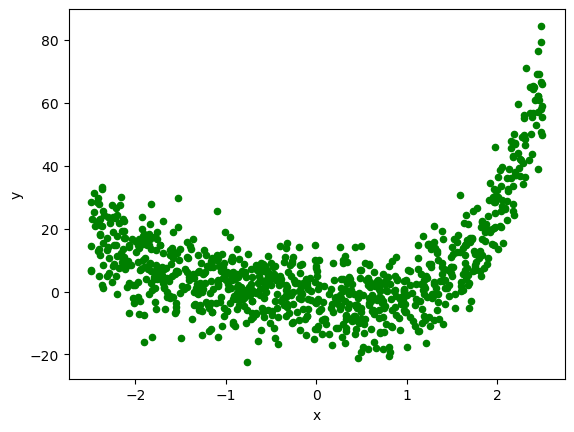

In [12]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y', color='green')

In [13]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2)
X_reg_train = X_reg_train.reshape(-1,1)
X_reg_test = X_reg_test.reshape(-1,1)

## 4.5 Regression
### LinearSVR regresspr and Polynomial of the 4th degree

In [14]:
model_reg = Pipeline([("scaler", StandardScaler()),
                     ("polynomial_features", PolynomialFeatures(degree=4)),
                     ("regressor", LinearSVR())])

model_reg.fit(X_reg_train, y_reg_train)
y_reg_train_pred = model_reg.predict(X_reg_train)
y_reg_test_pred = model_reg.predict(X_reg_test)

mse_reg_train = mean_squared_error(y_reg_train, y_reg_train_pred)
mse_reg_test = mean_squared_error(y_reg_test, y_reg_test_pred)

print(f'{mse_reg_train} {mse_reg_test}')

65.1569260837386 53.15331608847072


/home/pati/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### SVR regressor with 'poly' kernel of the 4th degree

In [15]:
model_svr_poly = SVR(kernel='poly', degree=4)

model_svr_poly.fit(X_reg_train, y_reg_train)
y_reg_train_pred_poly = model_svr_poly.predict(X_reg_train)
y_reg_test_pred_poly = model_svr_poly.predict(X_reg_test)

mse_svr_poly_train = mean_squared_error(y_reg_train, y_reg_train_pred_poly)
mse_svr_poly_test = mean_squared_error(y_reg_test, y_reg_test_pred_poly)

print(f'{mse_svr_poly_train} {mse_svr_poly_test}')

111.57891389349606 111.38361545724374


### Grid Search CV

In [16]:
param_grid = {"C" : [0.1, 1, 10], "coef0" : [0.1, 1, 10]}

grid_search = GridSearchCV(SVR(kernel='poly', degree=4), param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X.reshape(-1,1), y)

best_params = grid_search.best_params_
print("Best parameters for SVR:", best_params)

regressor_svr_best = SVR(kernel='poly', degree=4, C=best_params['C'], coef0=best_params['coef0'])
regressor_svr_best.fit(X_reg_train, y_reg_train)

y_reg_train_pred_svr_best = regressor_svr_best.predict(X_reg_train)
y_reg_test_pred_svr_best = regressor_svr_best.predict(X_reg_test)

mse_train_svr_best = mean_squared_error(y_reg_train, y_reg_train_pred_svr_best)
mse_test_svr_best = mean_squared_error(y_reg_test, y_reg_test_pred_svr_best)

print(f'{mse_train_svr_best} {mse_test_svr_best}')

Best parameters for SVR: {'C': 1, 'coef0': 10}
64.92377162266469 52.82781279938414


## Saving to pickle

In [17]:
mse_results = [mse_reg_train, mse_reg_test, mse_train_svr_best, mse_test_svr_best]

with open("reg_mse.pkl", 'wb') as f:
    pickle.dump(mse_results, f)

print(mse_results)

[65.1569260837386, 53.15331608847072, 64.92377162266469, 52.82781279938414]
